<center><h1>DSCI 552 HW2</h1></center>
<br>
<center><font size="4">Combined Cycle Power Plant Data</font></center>
<br />
<table align="center">
    <tbody>
    <tr><td>Name</td><td>Parth Patel</td></tr>
    <tr><td>USC ID</td><td>5228107917</td></tr>
     <tr><td>Github Username</td><td>parthpar-usc</td></tr>
    <tr><td>Email</td><td>parthpar@usc.edu</td></tr>
    </tbody>
</table>

### 1(a) Dowload the data from the link Below:
### https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

In [2]:
! pip install statsmodels
! pip install openpyxl
! pip install seaborn
! pip install scipy
! pip install scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize
import random
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade 

### 1(b) Exploring the Data.

##### (i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
column_names = ["AT", "V", "AP", "RH", "PE"]
# path = "../data/CCPP/Fold5x2_pp.xlsx"
path='../data/CCPP/Folds5x2_pp.xlsx'

data = pd.read_excel(path,sheet_name='Sheet1')
rows=data.shape[0]
cols=data.shape[1]
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

data


Number of rows: 9568
Number of columns: 5


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


#### (ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe yourfindings.

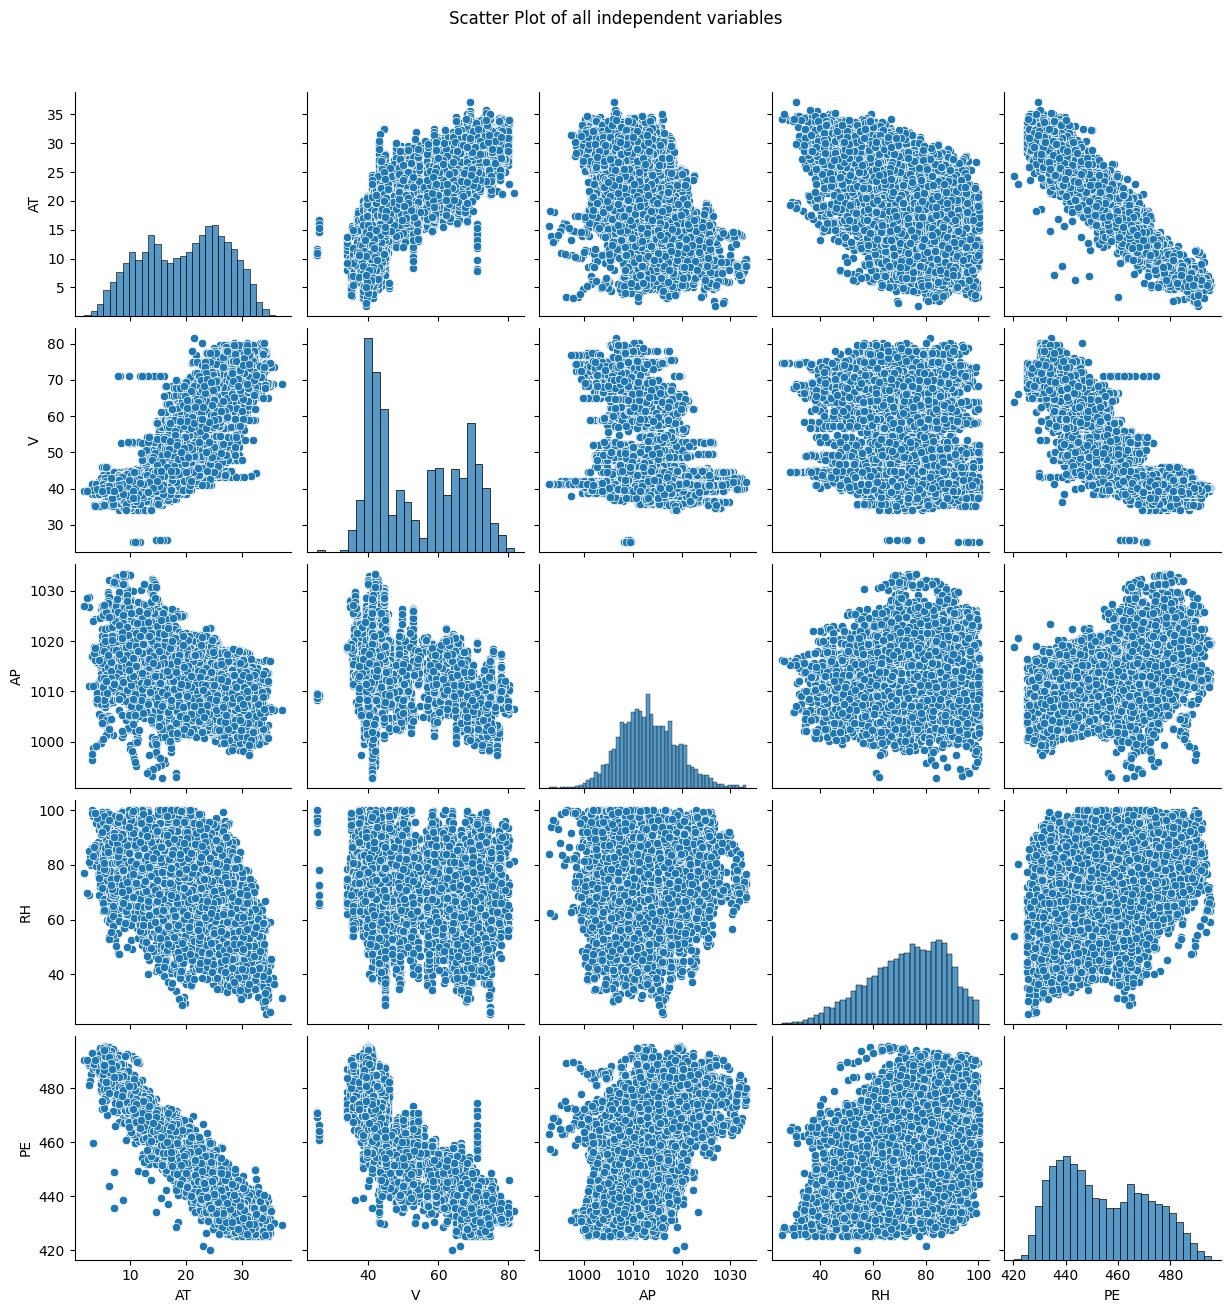

In [4]:
grph = sns.pairplot(data)
grph.fig.suptitle("Scatter Plot of all independent variables", y=1.05)
plt.show()

#### (iii) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table

In [5]:
data_statistics = data.agg([
    'mean', 
    'median', 
    lambda x: x.max() - x.min(),  
    lambda x: x.quantile(0.25),   
    lambda x: x.quantile(0.75),   
    lambda x: x.quantile(0.75) - x.quantile(0.25), 
]).transpose()

data_statistics.columns = ['Mean', 'Median', 'Range', 'First Quartile', 'Third Quartile', 'Interquartile Range']

data_statistics = data_statistics.round(2)

display(data_statistics)


,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
AT,19.65,20.34,35.30,13.51,25.72,12.21
V,54.31,52.08,56.20,41.74,66.54,24.80
AP,1013.26,1012.94,40.41,1009.10,1017.26,8.16
RH,73.31,74.97,74.60,63.33,84.83,21.50
PE,454.37,451.55,75.50,439.75,468.43,28.68


### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Analyzing AT:


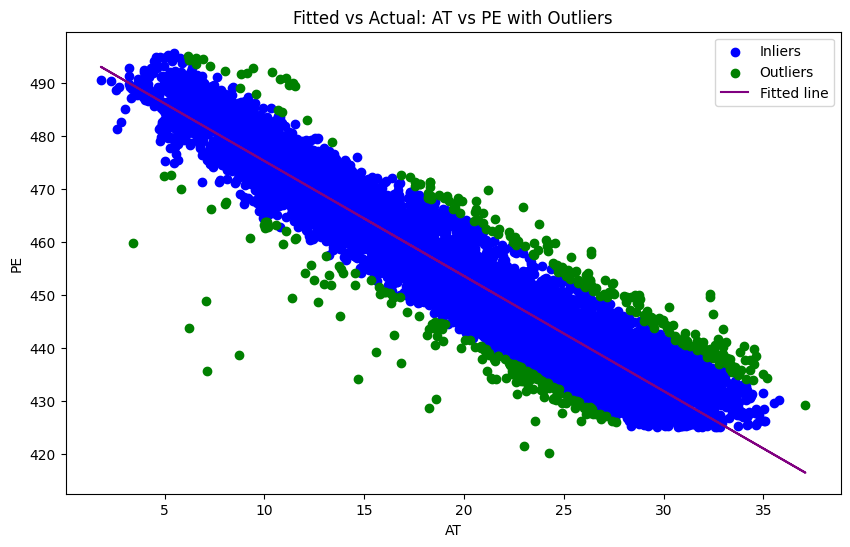

Summary of Regression fit for predictor=AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:53   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

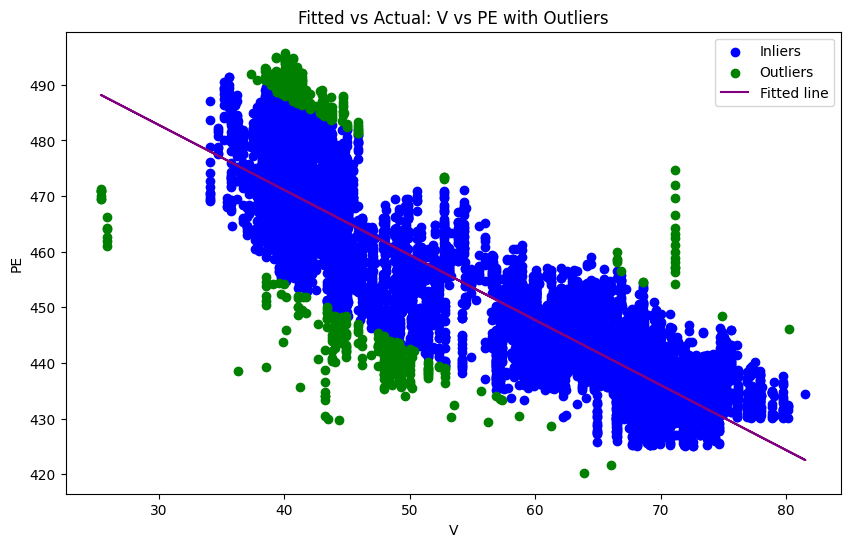

Summary of Regression fit for predictor=V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:54   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

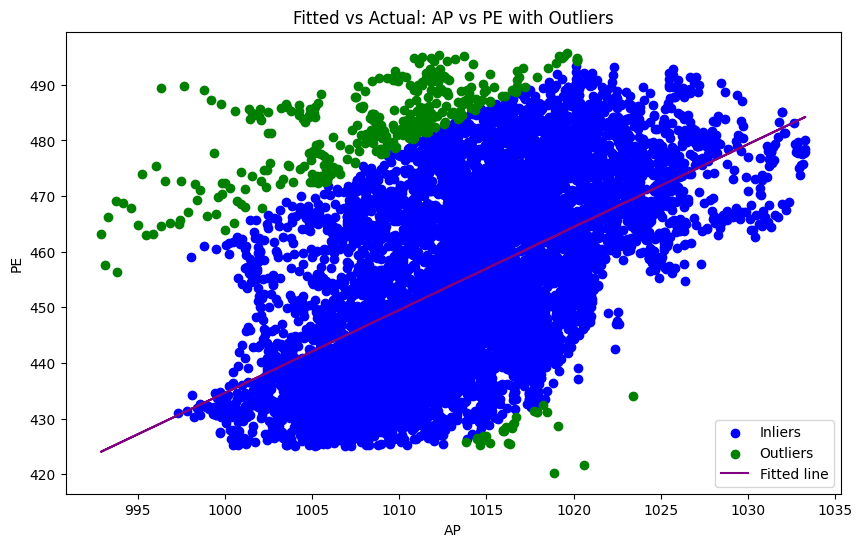

Summary of Regression fit for predictor=AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:54   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

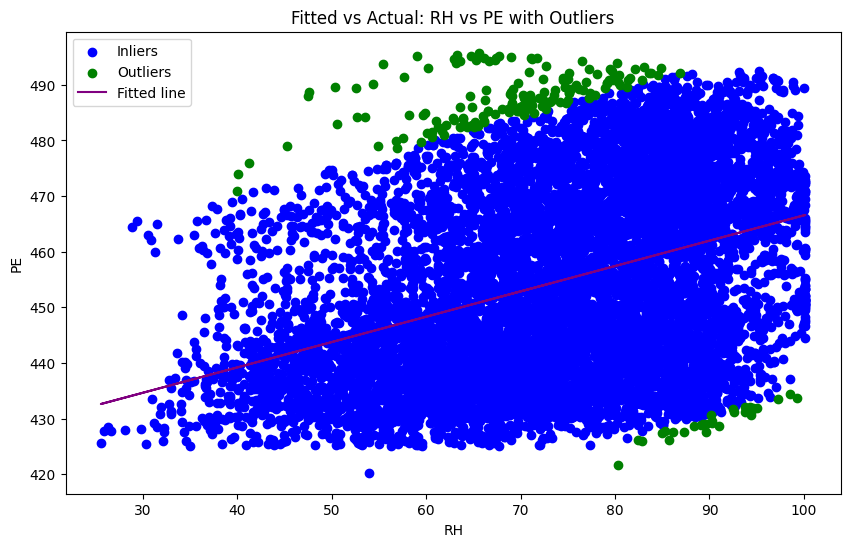

Summary of Regression fit for predictor=RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:54   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [6]:
response_var = 'PE'
predictors = ["AT", "V", "AP", "RH"]

def fitAndSummarize(predictor):
    if 'outlier' in data.columns:
        data.drop('outlier', axis=1, inplace=True)
        
    X = sm.add_constant(data[predictor])
    y = data[response_var]
    model = sm.OLS(y, X).fit()
    
    data['predicted'] = model.predict(X)
    data['residual'] = model.resid

    threshold = 2 * np.std(data['residual'])
    data['outlier'] = np.abs(data['residual']) > threshold

    # fq = np.quantile(data[predictor], 0.25)
    # tq = np.quantile(data[predictor], 0.75)
    # iqr = tq - fq
    # lower_bound = fq - 1.5 * iqr
    # upper_bound = tq + 1.5 * iqr

    # data['outlier'] = data[(data[predictor] < lower_bound) | (data[predictor] > upper_bound)]

    plt.figure(figsize=(10, 6))
    plt.scatter(data.loc[~data['outlier'], predictor], data.loc[~data['outlier'], response_var], color='blue', label='Inliers')
    plt.scatter(data.loc[data['outlier'], predictor], data.loc[data['outlier'], response_var], color='green', label='Outliers')
    plt.plot(data[predictor], data['predicted'], color='purple', label='Fitted line')
    plt.xlabel(predictor)
    plt.ylabel(response_var)
    plt.title(f'Fitted vs Actual: {predictor} vs {response_var} with Outliers')
    plt.legend()
    plt.show()
    print(f"Summary of Regression fit for predictor={predictor}")
    print(model.summary())
    outliers = data.loc[data['outlier'], [predictor, response_var]]
    return outliers

for predictor in predictors:
    print(f"Analyzing {predictor}:")
    outliers = fitAndSummarize(predictor)
    if outliers.empty:
        print("No outliers present!")
    else:
        print(f"Outliers detected for {predictor}:")
        print(outliers.describe())

### (d)Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj=0


In [7]:
X = data[['AT', 'V', 'AP', 'RH']]  
y = data['PE'] 
X_with_const = sm.add_constant(X)

model_multiple = sm.OLS(y, X_with_const).fit()

print("Summary of all independent variables")
print(model_multiple.summary())


Summary of all independent variables
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:54   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        45

#### Since, p-values are 0.00 for all of the predictors, all predictors are statistically significant to predict PE. So, we can reject null hypothesis for all of the predictors.

In [8]:
model_simple_AT = sm.OLS(y, sm.add_constant(data[['AT']])).fit()
model_simple_V = sm.OLS(y, sm.add_constant(data[['V']])).fit()
model_simple_AP = sm.OLS(y, sm.add_constant(data[['AP']])).fit()
model_simple_RH = sm.OLS(y, sm.add_constant(data[['RH']])).fit()



In [9]:
multiple_coeffs = model_multiple.params.to_dict()

simple_coeffs = {
    'AT': model_simple_AT.params['AT'],
    'V': model_simple_V.params['V'],
    'AP': model_simple_AP.params['AP'],
    'RH': model_simple_RH.params['RH']
}


### (e)How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

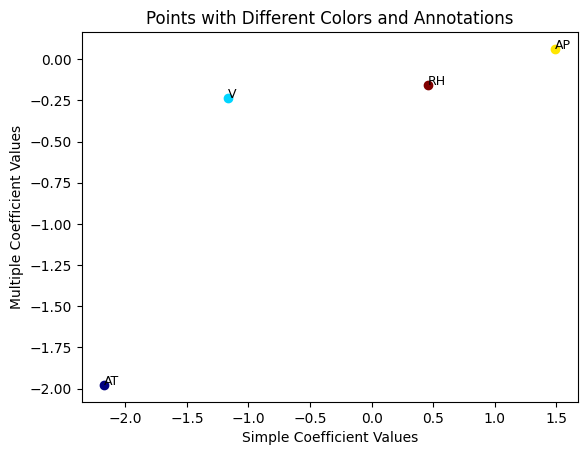

In [10]:
simple_coef_values = [simple_coeffs.get(pred, 0) for pred in predictors] 
multiple_coef_values = [multiple_coeffs.get(pred, 0) for pred in predictors]
names = ['AT', 'V', 'AP', 'RH']  
colors = plt.cm.jet(np.linspace(0, 1, len(simple_coef_values)))

for i in range(len(simple_coef_values)):
    plt.scatter(simple_coef_values[i], multiple_coef_values[i], color=colors[i], label=names[i])
    plt.text(simple_coef_values[i], multiple_coef_values[i], names[i], fontsize=9)

plt.xlabel('Simple Coefficient Values')
plt.ylabel('Multiple Coefficient Values')
plt.title('Points with Different Colors and Annotations')
plt.show()


### (f)Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y=β0+β1X+β2X^2+β3X^3+ε

In [11]:
for predictor in predictors:
    X = data[[predictor]]
    X_poly = pd.DataFrame({
        'X1': X[predictor],
        'X2': X[predictor]**2,
        'X3': X[predictor]**3
    })
    X_poly = sm.add_constant(X_poly) 

    model = sm.OLS(data[response_var], X_poly).fit()
    
    print(f"Results for {predictor}:")
    print(model.summary())
    


Results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    


### (g)Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant

In [12]:
interaction_terms = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model = ols(formula = interaction_terms, data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

### Afer Analyzing the data above:

Considering p = 0.05 as the threshold value

1. The p-values for V, AP, RH, and the interaction terms AT:V, AT:RH, V:AP, AP:RH fall below our significance threshold, indicating their statistical significance. Therefore, we have sufficient evidences to dismiss the null hypothesis for these predictors.
2. AT, AT:AP, and V:RH exhibit higher p-values, which prevents us from discarding the null hypothesis for these variables.

### (h)Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,and remove insignificant variables using p-values (be careful about interactionterms). Test both models on the remaining points and report your train and test MSEs

In [13]:
from sklearn.model_selection import train_test_split
X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
error_summary={}
def fit_and_evaluate_model(model_name, model_formula):
    train_data = pd.concat([X_train, y_train], axis=1)
    fitted_model = smf.ols(model_formula, data=train_data).fit()
    print(fitted_model.summary())

    predictions_on_training = fitted_model.predict(train_data)
    test_data = pd.concat([X_test, y_test], axis=1)
    predictions_on_testing = fitted_model.predict(test_data)

    mse_for_training = mean_squared_error(y_train, predictions_on_training)
    mse_for_testing = mean_squared_error(y_test, predictions_on_testing)
    
    output_details = {
        "Formula Used": model_formula,
        "Training MSE": round(mse_for_training, 4),
        "Testing MSE": round(mse_for_testing, 4)
    }
    error_summary[model_name] = [mse_for_training, mse_for_testing]
    return pd.DataFrame.from_dict(output_details, orient='index', columns=['Value']).reset_index().rename(columns={'index': 'Metric'})



In [15]:

FORMULA_1 = "PE ~ AT + V + AP + RH"
fit_and_evaluate_model("linear regression with all predictors", FORMULA_1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8414     11.502     40.673      0.0

,Metric,Value
0,Formula Used,PE ~ AT + V + AP + RH
1,Training MSE,20.5808
2,Testing MSE,21.2399


In [16]:
FORMULA_2 = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
fit_and_evaluate_model("inter quad terms linear regression", FORMULA_2)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7664.9809   1429.568     

,Metric,Value
0,Formula Used,"PE ~ AT + V + AP + RH + np.power(AT,2) + np.po..."
1,Training MSE,17.8878
2,Testing MSE,18.6473


Based on the regression result above, we cannot reject the Null Hypothesis of $AT$,$V^2$,$V$,$AT:AP$,$V:AP$,$V:RH$. 
Thus, we will only remove the 2-order terms. Although $AT$ and $V$ have large p-value as well, removing basic predictors will violate the hierachical priciple when the 
$AT:V$ is included.

For every run, the data is shuffled to splitting into training data and testing data. Hence, the output is likely going to vary for every run. Generally, $AT$ has had p-value > 0.05 and sometimes not.

#### After Removing statistically insignificant intercation terms

In [17]:
FORMULA_3 = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH'
fit_and_evaluate_model("remove insignificant predictors linear regression", FORMULA_3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.046e+04   1091.512     

,Metric,Value
0,Formula Used,"PE ~ AT + V + AP + RH + np.power(AT,2) + np.po..."
1,Training MSE,17.9178
2,Testing MSE,18.6943


In [18]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
train_errors_raw = []
test_errors_raw = []
train_errors_norm = []
test_errors_norm = []

k_values = range(1, 101)

for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(X_train_normalized, y_train)
    y_train_pred_norm = knn_norm.predict(X_train_normalized)
    y_test_pred_norm = knn_norm.predict(X_test_normalized)
    
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))
    train_errors_norm.append(mean_squared_error(y_train, y_train_pred_norm))
    test_errors_norm.append(mean_squared_error(y_test, y_test_pred_norm))


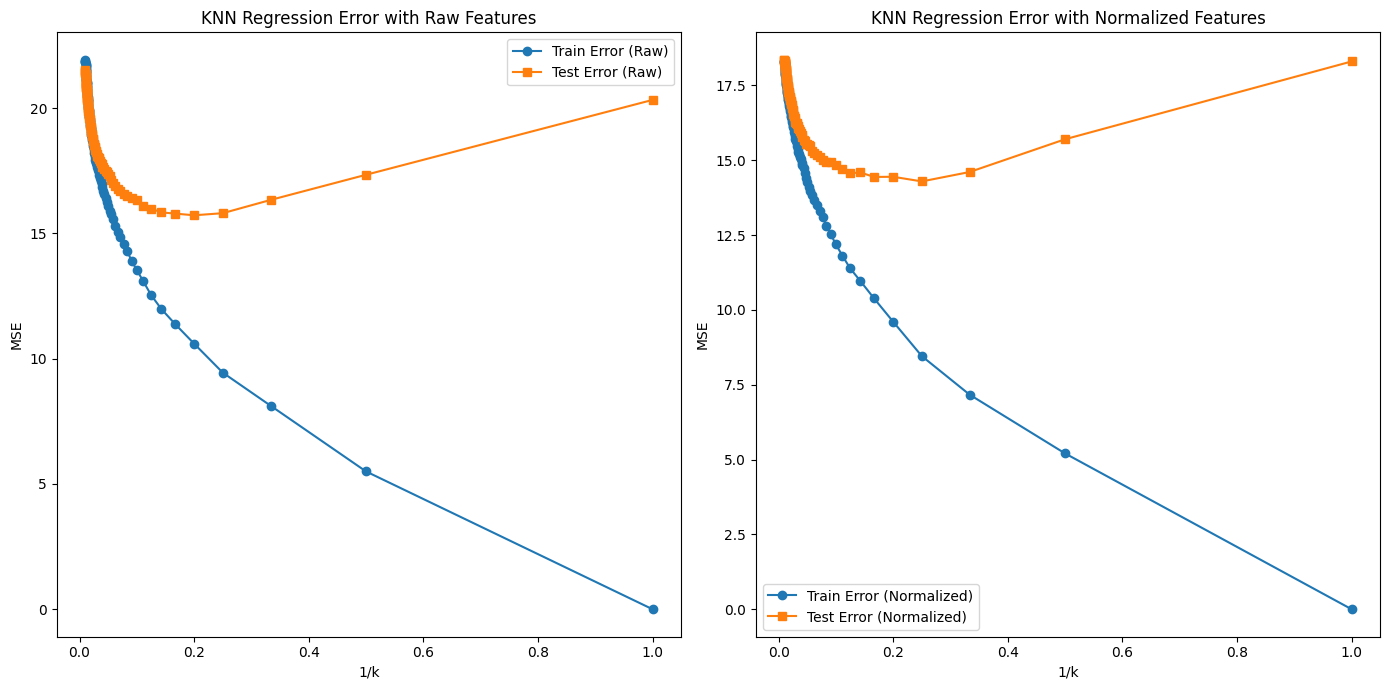

In [19]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot([1/k for k in k_values], train_errors_raw, label='Train Error (Raw)', marker='o')
plt.plot([1/k for k in k_values], test_errors_raw, label='Test Error (Raw)', marker='s')
plt.title('KNN Regression Error with Raw Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([1/k for k in k_values], train_errors_norm, label='Train Error (Normalized)', marker='o')
plt.plot([1/k for k in k_values], test_errors_norm, label='Test Error (Normalized)', marker='s')
plt.title('KNN Regression Error with Normalized Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
minimum_knn_raw_error = min(test_errors_raw)
minimum_knn_normalized_error = min(test_errors_norm)

print(f"Raw KNN Minimum Test Error = {round(minimum_knn_raw_error,4)}")
print(f"Normalized KNN Minimum Test Error = {round(minimum_knn_normalized_error,4)}")

Raw KNN Minimum Test Error = 15.7268
Normalized KNN Minimum Test Error = 14.2913


# 2. ISLR 2.4.1

### (a)The sample size n is extremely large, and the number of predictors p is small.

#####  With a large sample size and a small number of predictors, there's a risk of underfitting with an inflexible model due to its limited capacity to capture the underlying data structure. A flexible model, which can adapt more closely to the data specifics, tends to perform better in such scenarios by utilizing the abundant information without the immediate risk of overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

#### When faced with a large number of predictors compared to observations, a flexible model is prone to overfitting, capturing noise as if it were a signal. An inflexible model, with its constrained approach, is less likely to overfit and thus performs better, focusing on the most significant patterns without being misled by the high-dimensional space.

### (c) The relationship between the predictors and response is highly non-linear.

#### Inflexible models, due to their limited adaptability, struggle to capture complex, non-linear relationships accurately. Flexible models, designed to adjust to intricate patterns in the data, outperform inflexible ones in such situations by modeling the nuanced variations more effectively.

### (d) The variance of the error terms, i.e. σ^2 = Var(ϵ), is extremely high.

#### A scenario with high error variance introduces significant noise into the observations, making it challenging to discern the true underlying pattern. Flexible models, which tend to fit closely to the data, may overfit by mistaking noise for useful information. In contrast, inflexible models, by focusing on broader trends and ignoring finer (noisy) details, are less susceptible to overfitting in noisy environments and thus perform better.

# 3. ISLR:2.4.7

### (a) The Euclidean distances between each observation and the test point

In [21]:
def calculate_euclidean_distance(point1, point2):
    return np.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

observation_points = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
test_point = [0, 0, 0]

distances = [[index + 1, calculate_euclidean_distance(obs, test_point)] for index, obs in enumerate(observation_points)]

def print_table(header, rows):
    print(f"{header[0]}\t{header[1]}")
    for row in rows:
        print(f"{row[0]}\t{row[1]:.2f}")

table_header = ["Obs.", "Euclidean Distance"]
print_table(table_header, distances)


Obs.	Euclidean Distance
1	3.00
2	2.00
3	3.16
4	2.24
5	1.41
6	1.73


### (b) What is our prediction with K = 1? Why?
#### With K=1, we look at the nearest neighbor to the test point, which is Observation 5 (Distance = 1.414) with a response of 'Green'. Thus, our prediction for Y when X1 = X2 = X3 = 0 with K=1 is 'Green'.

### (c) What is our prediction with K = 3? Why?
#### For K=3, we consider the three closest observations, which are Observations 5, 6, and 2. Among these, two observations ('Red' from Obs 2 and 6, and 'Green' from Obs 5) are considered, and the mode is 'Red'. Therefore, the prediction for Y with K=3 is 'Red'.

### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
#### If the Bayes decision boundary is highly non-linear, we would generally expect the best value for K to be small. This is because:

#### - A smaller K allows the KNN algorithm to adapt more flexibly to the data's local structures, which is beneficial in capturing complex, non-linear patterns and intricacies of the decision boundary.
#### - A larger K makes the method more inflexible by smoothing over the decision boundary, which could dilute the effects of local patterns in the presence of a highly non-linear relationship, leading to poorer performance.

#### Thus, in scenarios characterized by complex, non-linear relationships, a smaller K enhances the model's ability to conform closely to the data's underlying structure, potentially improving prediction accuracy.





